In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
# Task 1: Image Compression

def compress_image(image_path, output_path, quality=50, format='jpeg'):
    image = cv2.imread(image_path)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality] if format == 'jpeg' else [int(cv2.IMWRITE_PNG_COMPRESSION), 9]
    success, encoded_image = cv2.imencode(f'.{format}', image, encode_param)
    if success:
        with open(output_path, 'wb') as f:
            f.write(encoded_image)
        print(f"Image compressed and saved at {output_path}")
    else:
        print("Compression failed")

In [3]:
# Task 2: CNN on MNIST and CIFAR-10

def build_cnn(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, dataset_name):
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"{dataset_name} Accuracy: {accuracy:.4f}")

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {dataset_name}')
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9129 - loss: 0.2897 - val_accuracy: 0.9857 - val_loss: 0.0434
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0461 - val_accuracy: 0.9877 - val_loss: 0.0398
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9913 - loss: 0.0276 - val_accuracy: 0.9893 - val_loss: 0.0314
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accuracy: 0.9892 - val_loss: 0.0357
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9894 - val_loss: 0.0342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9919 - val_loss: 0.0256
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9917 - val_loss: 0.0280
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9974 - loss: 0.007

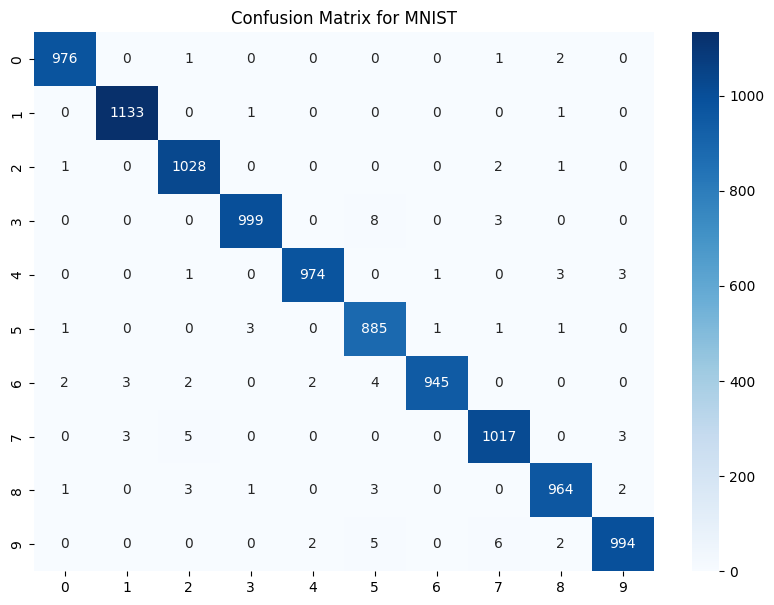

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3994 - loss: 1.6557 - val_accuracy: 0.5983 - val_loss: 1.1497
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6164 - loss: 1.0935 - val_accuracy: 0.6356 - val_loss: 1.0518
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6769 - loss: 0.9296 - val_accuracy: 0.6722 - val_loss: 0.9418
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7167 - loss: 0.8110 - val_accuracy: 0.6913 - val_loss: 0.9073
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7428 - loss: 0.7329 - val_accuracy: 0.7060 - val_loss: 0.8559
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7762 - loss: 0.6379 - val_accuracy: 0.7036 - val_loss: 0.8838
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7992 - loss: 0.5767 - val_accuracy: 0.7095 - val_loss: 0.9022
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8236 - loss: 0.5076

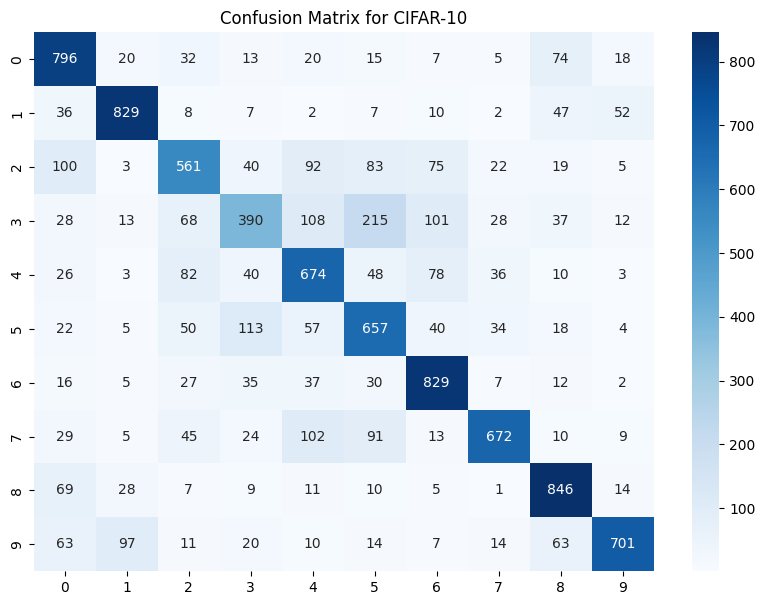

In [5]:
# Load and preprocess MNIST
def process_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    return x_train, y_train, x_test, y_test

# Load and preprocess CIFAR-10
def process_cifar10():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    return x_train, y_train.flatten(), x_test, y_test.flatten()

# Run experiments
x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist = process_mnist()
mnist_model = build_cnn((28, 28, 1), 10)
train_and_evaluate(mnist_model, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, "MNIST")

x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar = process_cifar10()
cifar_model = build_cnn((32, 32, 3), 10)
train_and_evaluate(cifar_model, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, "CIFAR-10")

In [8]:
compress_image("/content/up_5/Picture 1.jpg", "/content/up_5/compressed_image.jpg")

Image compressed and saved at /content/up_5/compressed_image.jpg
